In [1]:
from process import *
from visualize import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
import os
import warnings
warnings.filterwarnings("ignore")

# How many files from glycoshape are already compatible with glycontact?

In [ ]:
#Get all IUPAC from glycoshape and test conversion
#Report all cases that fail/succeed
iupac_list = get_glycoshape_IUPAC()
print(len(iupac_list))
g_list = iupac_list
success_fail_list = []
x = 1
for g_index in range(0,len(iupac_list)) :
    print(x)
    pdb_path = 'glycans_pdb'
    pdbs = check_available_pdb(pdb_path + '/' + iupac_list[g_index])
    success = True 
    pdb_error = ''
    monosac_error = ''
    explore_threshold_error = ''

    #Ensure that at least one pdb file has been downloaded for each glycan
    try :
        pdb_file = pdb_path + '/' + iupac_list[g_index] + "/" + pdbs[0]
    except :
        df = pd.DataFrame()
        pdb_error = 'pdb'

    #Apply PDB->IUPAC conversion, else, assume that it is because of an unexpected monosaccharide
    try :
        df = explore_threshold(pdb_file, iupac_list[g_index], threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
    except :
        df = pd.DataFrame()
        monosac_error = 'UnexpectedMonosaccharide'
    
    #Ensure the production of a converted df. 
    try : 
        print(df['atom_number'][0])
    except :
        success = False
        explore_threshold_error = 'CannotBuild'

    errors = pdb_error + '_' + monosac_error + '_' + explore_threshold_error
    
    if errors == '__' :
        errors = 'SUCCESS'
    
    success_fail_list.append(errors)
    x +=1

fdf = pd.DataFrame()
fdf['glycan'] = g_list
fdf['success'] = success_fail_list    

In [81]:
success_df = fdf[fdf['success']=='SUCCESS']

In [82]:
success_df #178 -> 274 --> 314 --> 364

,glycan,success
0,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...,SUCCESS
1,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...,SUCCESS
2,GlcNAc(b1-6)GalNAc,SUCCESS
3,Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNA...,SUCCESS
4,Neu5Ac(a2-3)Gal(b1-3)GalNAc,SUCCESS
...,...,...
440,Neu5Ac(a2-3)Gal(b1-3)GlcNAc(a1-3)Gal(b1-4)Glc,SUCCESS
441,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(...,SUCCESS
442,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...,SUCCESS
443,Fuc(a1-3)[Fuc(a1-2)Gal(b1-4)]GlcNAc(b1-3)Gal(b...,SUCCESS


In [83]:
unsuccess_df = fdf[fdf['success']!='SUCCESS']

In [84]:
unsuccess_df #256 --> 171 --> 131 --> 81

,glycan,success
21,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...,__CannotBuild
22,GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS,_UnexpectedMonosaccharide_CannotBuild
26,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal...,__CannotBuild
34,GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc,_UnexpectedMonosaccharide_CannotBuild
37,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]...,__CannotBuild
...,...,...
396,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...,_UnexpectedMonosaccharide_CannotBuild
400,GalNAc(b1-4)[Fuc(a1-3)]GlcNAc6Pc(b1-2)Man(a1-3...,__CannotBuild
406,Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Fuc(...,pdb__CannotBuild
417,Xyl(b1-2)[Man(a1-3)]Man(a1-4)Gal(b1-6)Man,pdb__CannotBuild


In [87]:
unsuccess_df[unsuccess_df['success']=='__CannotBuild'] #235 --> 142 --> 102 --> 52

52


In [89]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='__CannotBuild'].to_list()
for u in ulist:
    print(u)

Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S
GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl
Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac
Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc
GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b

In [88]:
unsuccess_df[unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'] #20 -> 22 -> 22

,glycan,success
22,GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS,_UnexpectedMonosaccharide_CannotBuild
34,GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc,_UnexpectedMonosaccharide_CannotBuild
81,Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideo...,_UnexpectedMonosaccharide_CannotBuild
86,GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S...,_UnexpectedMonosaccharide_CannotBuild
118,GalA(a1-4)GlcA(b1-4)Glc,_UnexpectedMonosaccharide_CannotBuild
121,GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S,_UnexpectedMonosaccharide_CannotBuild
147,IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a...,_UnexpectedMonosaccharide_CannotBuild
187,GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)GlcA(b1-...,_UnexpectedMonosaccharide_CannotBuild
217,Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Rha(a1-...,_UnexpectedMonosaccharide_CannotBuild
218,GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS6S,_UnexpectedMonosaccharide_CannotBuild


In [16]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'].to_list()
for u in ulist:
    print(u)

GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS
GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc
Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideoxyhexose
GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S
GalA(a1-4)GlcA(b1-4)Glc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc6S(a1-4)GlcA
Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha
GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S
Man(a1-2)GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc
Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)Glc
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS
GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS6S
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc(a1-4)GlcA
GlcNS3S6

In [70]:
unsuccess_df[unsuccess_df['success']=='pdb__CannotBuild'] #1 --> 7 --> 7

,glycan,success
134,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal...,pdb__CannotBuild
318,GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)Gl...,pdb__CannotBuild
355,Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-3)[G...,pdb__CannotBuild
360,Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-3)[F...,pdb__CannotBuild
371,Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNA...,pdb__CannotBuild
406,Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Fuc(...,pdb__CannotBuild
417,Xyl(b1-2)[Man(a1-3)]Man(a1-4)Gal(b1-6)Man,pdb__CannotBuild


In [17]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='pdb__CannotBuild'].to_list()
for u in ulist:
    print(u)

Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)]Gal(b1-4)Glc
GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc
Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-4)Glc
Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Xyl(b1-2)[Man(a1-3)]Man(a1-4)Gal(b1-6)Man


# From the successully built glycans, group them by identical silhouette
## silhouette = same shape with similar sugars occupying similar positions by with different linkage types

In [17]:
s_glycan = success_df['glycan'].to_list()
topo_groups = [] # groups of same topology/silhouette
nullified_list = []
group_list = []
for s in s_glycan :
    nullified = s.replace('Glc(','Hex(').replace('Gal(','Hex(').replace('Man(','Hex(').replace('GlcNAc(','HexNAc(').replace('GalNAc(','HexNAc(').replace('Neu5Ac(','Sia(').replace('Neu5Gc(','Sia(').replace('(a1-3)','').replace('(a1-2)','').replace('(a1-4)','').replace('(a1-5)','').replace('(a1-6)','').replace('(b1-2)','').replace('(b1-3)','').replace('(b1-4)','').replace('(b1-5)','').replace('(b1-6)','').replace('(a2-6)','').replace('(a2-3)','').replace('(a2-8)','').replace('(a2-9)','').replace('Xyl','Pen').replace('GlcNAc','HexNAc')
    if nullified in topo_groups :
        group = topo_groups.index(nullified)
    else :
        topo_groups.append(nullified)
        group = topo_groups.index(nullified)
    nullified_list.append(nullified)
    group_list.append(group)

success_df['nullified']=nullified_list
success_df['topological_group']=group_list


In [25]:
success_df.sort_values(by ='topological_group')

,glycan,success,nullified,topological_group
0,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...,SUCCESS,SiaHexHexNAc[SiaHexHexNAc]Hex[SiaHexHexNAc[Sia...,0
5,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man...,SUCCESS,HexHexNAcHex[HexNAcHex]HexHexNAcHexNAc,1
6,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...,SUCCESS,HexHexNAcHex[HexHexNAc[HexNAc]Hex]HexHexNAcHexNAc,2
7,Gal(b1-3)GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)GlcNAc...,SUCCESS,HexHexNAcHex[HexHexNAcHex][Pen]HexHexNAc[Fuc]H...,3
165,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...,SUCCESS,HexHexNAcHex[HexHexNAcHex][Pen]HexHexNAc[Fuc]H...,3
...,...,...,...,...
423,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]...,SUCCESS,Fuc[Hex]HexNAc[HexNAc]Hex[Hex[Hex]Hex]HexHexNA...,135
424,Glc(a1-2)Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2)M...,SUCCESS,HexHexHexHexHexHex[HexHex[HexHex]Hex]HexHexNAc...,136
426,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)Glc...,SUCCESS,SiaHexHexNAc[HexHexNAc]Hex[HexHexNAc[HexHexNAc...,137
427,Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,SUCCESS,HexHexNAc[Fuc]HexNAc,138


In [28]:
from collections import Counter

#Count which topological groups are the most common --> targetting them for further analysis
c = Counter(group_list)
print(c.most_common())

[(28, 6), (38, 5), (54, 5), (12, 4), (3, 3), (5, 3), (4, 2), (7, 2), (8, 2), (14, 2), (21, 2), (22, 2), (67, 2), (77, 2), (83, 2), (92, 2), (94, 2), (95, 2), (104, 2), (107, 2), (110, 2), (112, 2), (125, 2), (129, 2), (0, 1), (1, 1), (2, 1), (6, 1), (9, 1), (10, 1), (11, 1), (13, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (93, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (105, 1),

In [356]:
success_df['glycan'][success_df['topological_group']==54].to_list()

['Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc']

In [4]:
g = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
pdbs = check_available_pdb("glycans_pdb/"+g)

# Building distance tables and other metrics per glycan groups

In [6]:
#alpha
### Monosaccharide contact maps from alpha linked molecules
# Select alpha-linked glycan pdb files
alpha_pdbs = [pdb for pdb in pdbs if 'alpha' in pdb]


# read all structures and get contact maps
dfs = []
atom_dfs = []
for f in alpha_pdbs :
    df = explore_threshold("glycans_pdb/"+g+"/"+f,g, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    atom_dist_table = make_atom_contact_table(df,mode='inclusive', threshold = 200)
    dfs.append(dist_table)
    atom_dfs.append(atom_dist_table)

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table(dfs, 'amplify')
isvt = inter_structure_variability_table(dfs)

atom_isvt_amplified = inter_structure_variability_table(atom_dfs, 'amplify')
atom_isvt = inter_structure_variability_table(atom_dfs)

threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.6
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
threshold:2.4
glycowork and glyc

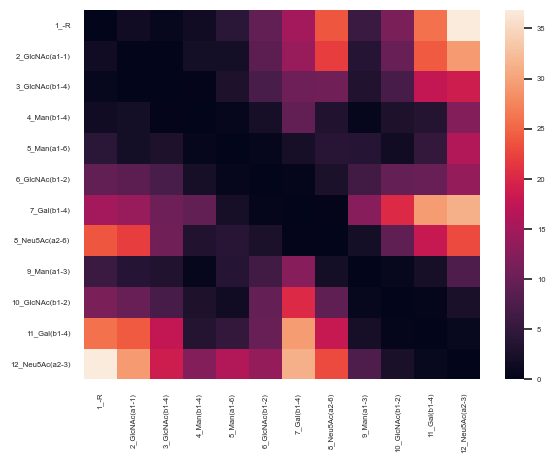

In [341]:
monosaccharide_contact_map(isvt)

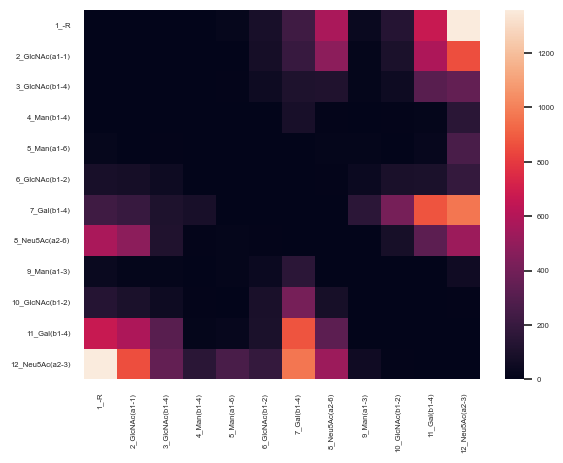

In [342]:
monosaccharide_contact_map(isvt_amplified)

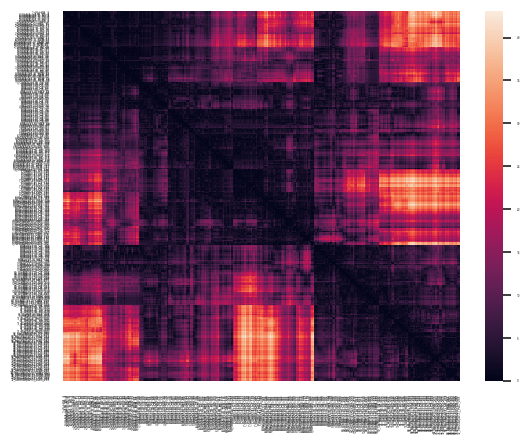

In [343]:
atom_contact_map(atom_isvt,size =0.2)

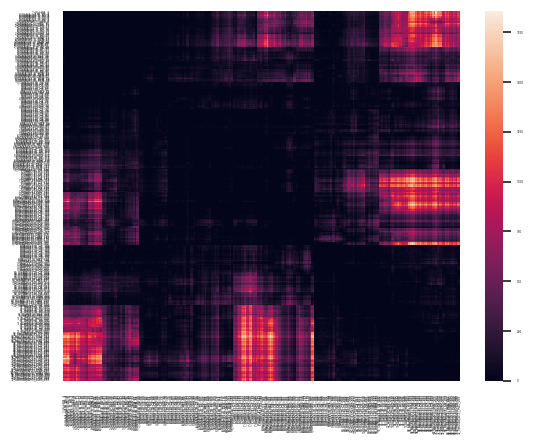

In [344]:
atom_contact_map(atom_isvt_amplified,size =0.2)

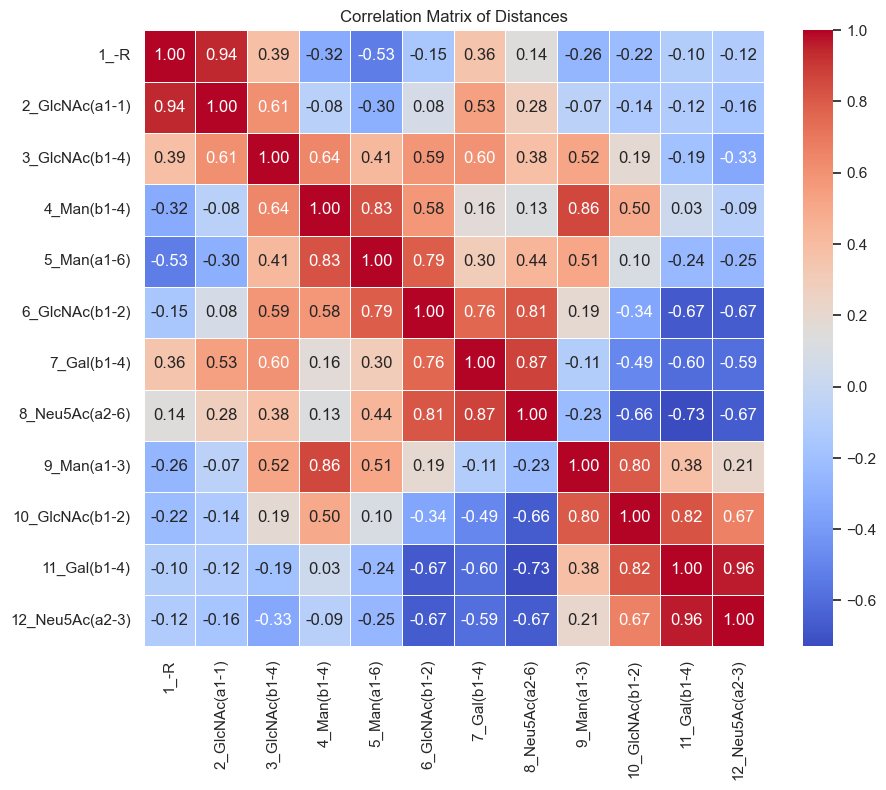

In [345]:
mx = make_correlation_matrix(dfs)
show_correlations(mx)

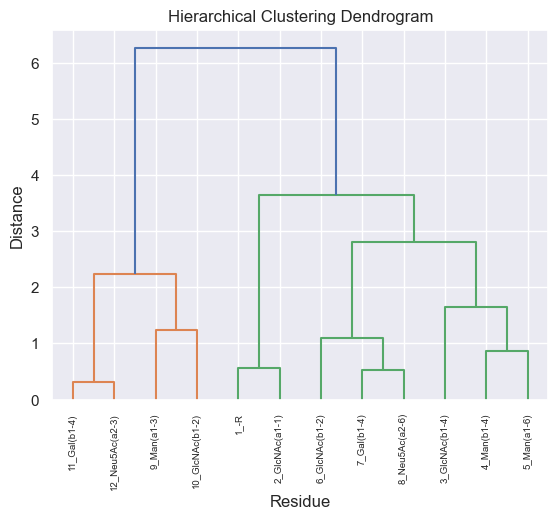

In [346]:
show_correlation_dendrogram(mx, font_size = 7)

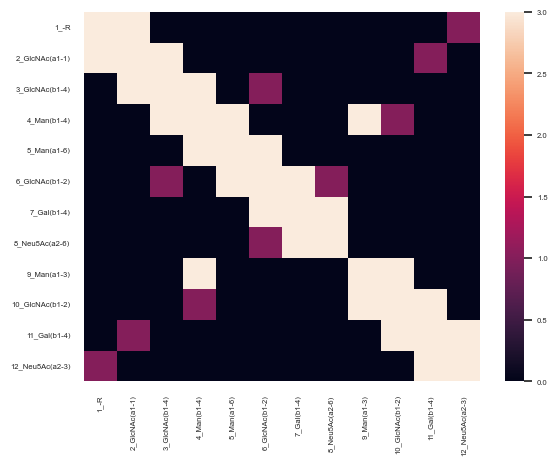

In [347]:
isft = inter_structure_frequency_table(dfs, threshold = 3)
monosaccharide_contact_map(isft)

In [348]:
#beta
alpha_pdbs = [pdb for pdb in pdbs if 'beta' in pdb]


# read all structures and get contact maps
dfs = []
atom_dfs = []
for f in alpha_pdbs :
    df = explore_threshold(f.split('_')[0]+'/'+ f, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    atom_dist_table = make_atom_contact_table(df,mode='inclusive', threshold = 200)
    dfs.append(dist_table)
    atom_dfs.append(atom_dist_table)

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table(dfs, 'amplify')
isvt = inter_structure_variability_table(dfs)

atom_isvt_amplified = inter_structure_variability_table(atom_dfs, 'amplify')
atom_isvt = inter_structure_variability_table(atom_dfs)

threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.6
glycowork and glycontact agree on the list of covalent linkages
Building a network from glycontact interactions generate a single molecule, as expected
threshold:2.4
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detec

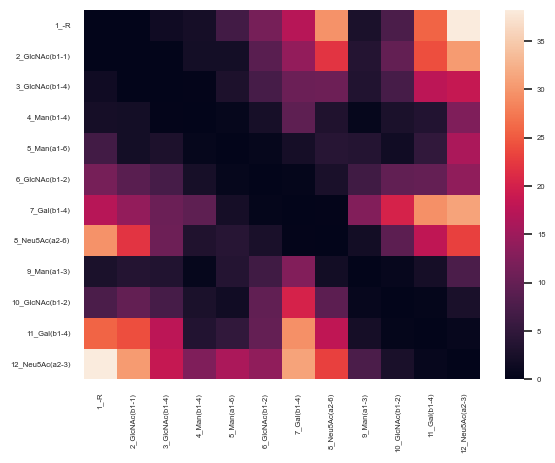

In [349]:
monosaccharide_contact_map(isvt)

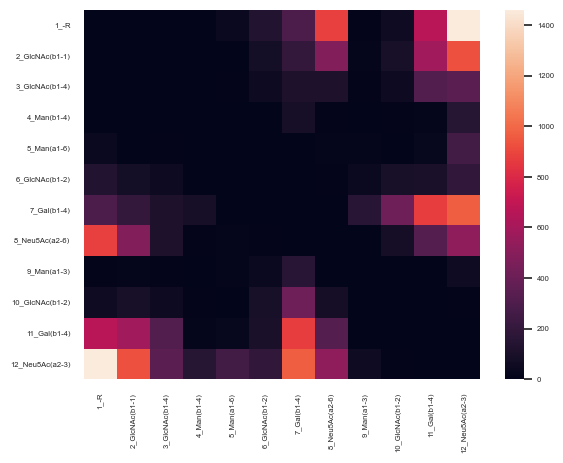

In [350]:
monosaccharide_contact_map(isvt_amplified)

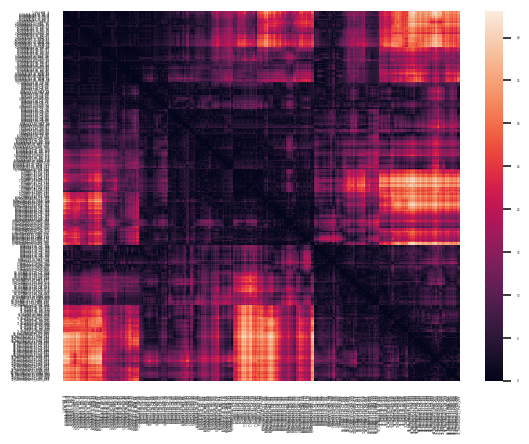

In [351]:
atom_contact_map(atom_isvt,size =0.2)

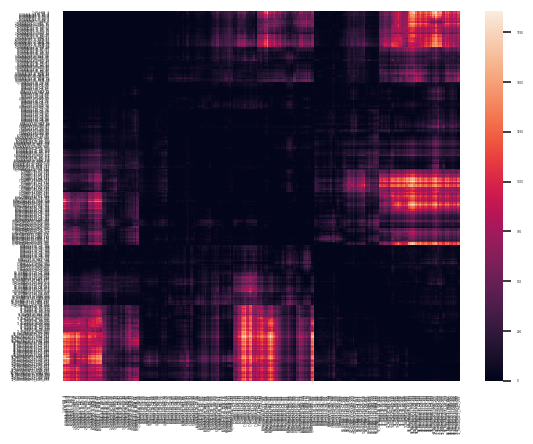

In [352]:
atom_contact_map(atom_isvt_amplified,size =0.2)

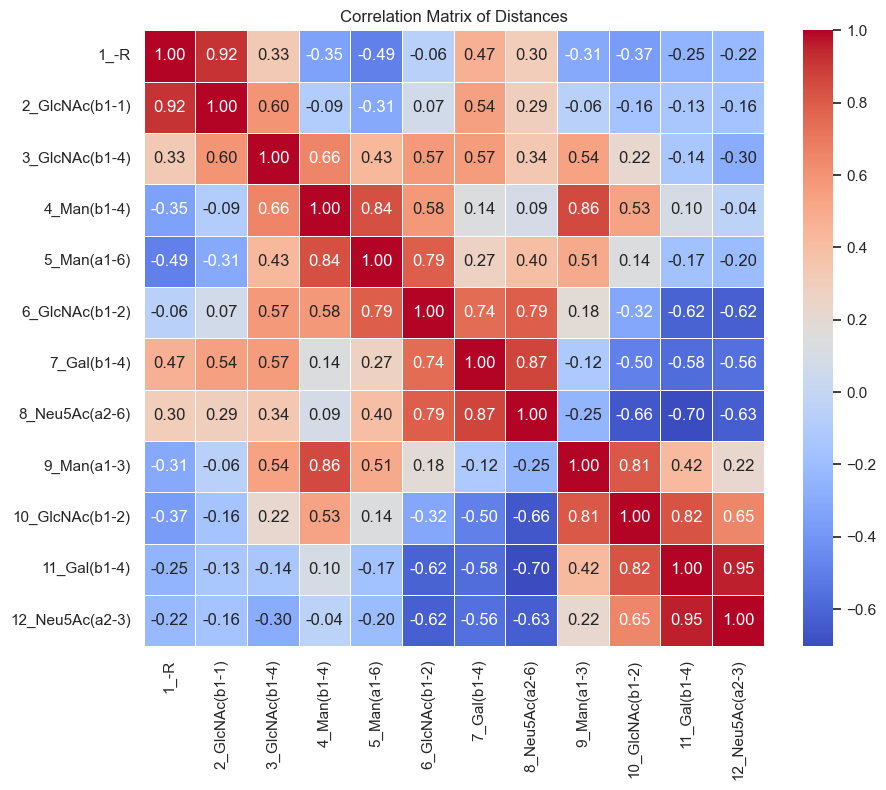

In [353]:
mx = make_correlation_matrix(dfs)
show_correlations(mx)

icoord[[5.0, 5.0, 15.0, 15.0], [25.0, 25.0, 35.0, 35.0], [10.0, 10.0, 30.0, 30.0], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [75.0, 75.0, 85.0, 85.0], [105.0, 105.0, 115.0, 115.0], [95.0, 95.0, 110.0, 110.0], [80.0, 80.0, 102.5, 102.5], [52.5, 52.5, 91.25, 91.25], [20.0, 20.0, 71.875, 71.875]]
dcoord[[0.0, 0.3519416794629673, 0.3519416794629673, 0.0], [0.0, 1.1610984776089903, 1.1610984776089903, 0.0], [0.3519416794629673, 2.1361069135333364, 2.1361069135333364, 1.1610984776089903], [0.0, 0.836604080652352, 0.836604080652352, 0.0], [0.0, 1.6102005407082811, 1.6102005407082811, 0.836604080652352], [0.0, 0.5742767875691475, 0.5742767875691475, 0.0], [0.0, 0.5115660362138514, 0.5115660362138514, 0.0], [0.0, 1.1948703669774987, 1.1948703669774987, 0.5115660362138514], [0.5742767875691475, 2.9349060250640373, 2.9349060250640373, 1.1948703669774987], [1.6102005407082811, 3.527548381072158, 3.527548381072158, 2.9349060250640373], [2.1361069135333364, 6.251517134752633, 6.25151713475

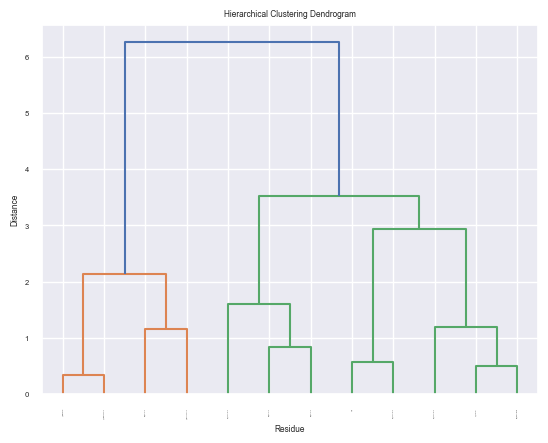

{'C1': ['11_Gal(b1-4)', '12_Neu5Ac(a2-3)', '9_Man(a1-3)', '10_GlcNAc(b1-2)'],
 'C2': ['3_GlcNAc(b1-4)',
  '4_Man(b1-4)',
  '5_Man(a1-6)',
  '1_-R',
  '2_GlcNAc(b1-1)',
  '6_GlcNAc(b1-2)',
  '7_Gal(b1-4)',
  '8_Neu5Ac(a2-6)']}

In [362]:
def show_correlation_dendrogram(corr_df, font_size = 1):
    ### Create a hierarchical clustering dendrogram from a correlation matrix as dataframe (corr_df)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    dendrogram = hierarchy.dendrogram(hierarchy.linkage(corr_df.values, method='ward'),
                                    labels=corr_df.columns,
                                    leaf_rotation=90,
                                    leaf_font_size=8,ax=ax
                                    )
    for d in dendrogram :
        print(d + str(dendrogram[d]))
    monolist = dendrogram['ivl']
    clustlist = dendrogram['leaves_color_list']
    uniclustlist =list(set(clustlist))
    res_dict = {}
    #Create a dict with the correlated clusters (=colors on dendrogram) --> 3D regions of glycans highly correlated 
    for c in uniclustlist :
        res_dict[c] = []
    for x in range(0,len(monolist)):
        res_dict[clustlist[x]].append(monolist[x])
    print(res_dict)
    ax.tick_params(axis='x', which='major', labelsize=font_size)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Residue')
    plt.ylabel('Distance')
    plt.show()
    return(res_dict)

show_correlation_dendrogram(mx)

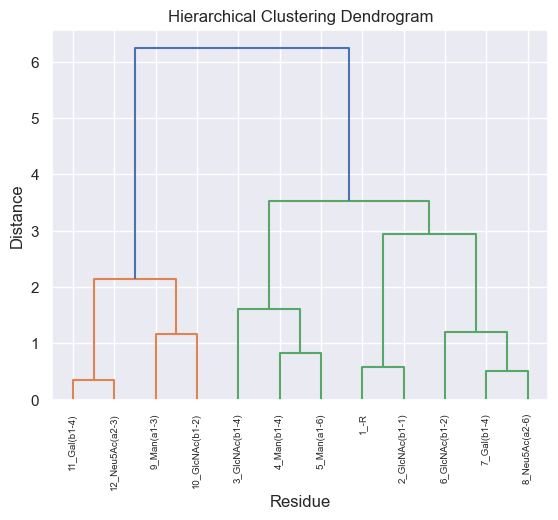

In [354]:
show_correlation_dendrogram(mx, font_size = 7)

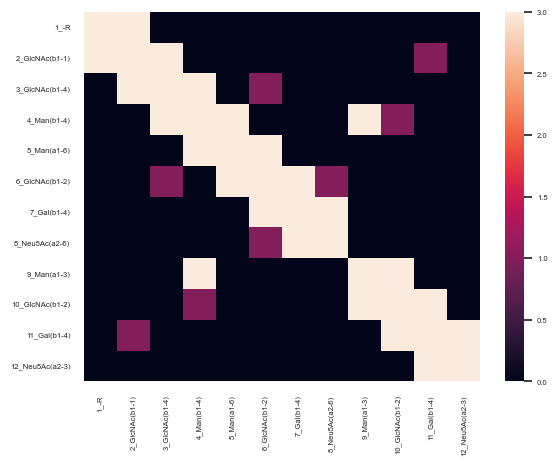

In [355]:
isft = inter_structure_frequency_table(dfs, threshold = 3)
monosaccharide_contact_map(isft)

## Pipeline idea: Analysis of a set of glycans from the same topological group --> make a dendrogram and extract clusters from these glycans
## --> save a dict named according to the glyco-silhouette and containing the different clusters as well as their content

# Investigation of failing glycans

In [375]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='pdb__CannotBuild'].to_list() #1
for gly in g :
    print(gly)

Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)]Gal(b1-4)Glc


In [376]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'].to_list() #1
for gly in g :
    print(gly)


GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS
GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc
GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S
GalA(a1-4)GlcA(b1-4)Glc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc6S(a1-4)GlcA
GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S
Man(a1-2)GlcA4Me(b1-4)GalA(a1-4)GlcA(b1-4)Glc
Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)Glc
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS
GlcA(b1-4)GlcNS(a1-4)IdoA2S(a1-4)GlcNS6S
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc(a1-4)GlcA
GlcNS3S6S(a1-4)IdoA2S(a1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNAc3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)IdoA2S(a1-4)GlcNAc3S6S(a1-4)GlcA2S
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)G

In [92]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='__CannotBuild'].to_list() #1
for gly in g :
    print(gly)

Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S
GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl
Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac
Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc
GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b

In [ ]:

#Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc --> weird structure on Glycoshape

In [11]:
def annotation_pipeline(pdb_file, glycan,threshold =2.7) :
  ### Huge function combining all smaller ones required to annotate a PDB file into IUPAC nomenclature, ensuring that the conversion is correct
  ### It allows also to determine if PDB to IUPAC conversion at the monosaccharide level works fine

  ### Extract glycan sequence from filename
  #glycan_sequence = get_glycan_sequence_from_path(pdb_file)
  glycan_sequence = glycan
  #print(glycan_sequence)

  ### Using glycowork, extract valid fragments (fragment = monolink like GlcNAc(b1-4))
  valid_fragments = [x.split(')')[0]+')' for x in link_find(glycan_sequence)]
  #print(valid_fragments)

  ### Detect binary connections (covalent linkages) using a maximal distance threshold and valid_fragments + build a mapping dictionnary
  res = extract_binary_interactions_from_PDB(pdb_file,threshold)
  mapping_dict, interaction_dict = create_mapping_dict_and_interactions(res,valid_fragments)
  print(mapping_dict)
  print(interaction_dict)
  #print(len(mapping_dict))
  #print(len(interaction_dict))

  ### Comparison of glycowork linkages and glycontact linkages to ensure correct extraction from PDB
  # Extract glycowork interactions:
  graph_output = glycan_to_graph(glycan_sequence)
  interactions_with_labels = extract_binary_glycowork_interactions(graph_output)
  print(interactions_with_labels)

  # Extract glycontact interactions:
  result_list = extract_binary_glycontact_interactions(interaction_dict)
  print("result list (binary interactions):" + str(result_list))
  
  # Compare glycowork IUPAC to graph versus glycontact PDB to graph to ensure glycontact detection of covalent linkages is correct (must return True)
  if glycowork_vs_glycontact_interactions(interactions_with_labels, result_list) == True :
    print("glycowork and glycontact agree on the list of covalent linkages")

    if check_reconstructed_interactions(interaction_dict) == True :
      print("Building a network from glycontact interactions generate a single molecule, as expected")

      ### When everything is validated: Annotation including correction of GalNAc annotated as GLC
      df = correct_dataframe(extract_3D_coordinates(pdb_file))
      result_df = annotate_pdb_data(df, mapping_dict)

    else :
      print("Although the fragments building binary interactions seem fine, some interactions are missed resulting in the reconstruction of multiple submolecules")
      return(pd.DataFrame())
  else :
    print("glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages")
    return(pd.DataFrame())
  return(result_df)

def explore_threshold(pdb_file, glycan, threshold_list=[2.2,2.4,2.5,2.6,2.7,2.8,2.9,2.25,2.45,2.55,2.65,2.75,2.85,2.95,3]):
  # Apply the annotation pipeline with different threshold, and return a correct df if found

  completed = False
  for x in threshold_list :
    print('threshold:' + str(x))
    res = annotation_pipeline(pdb_file,glycan,x)
    if len(res) != 0 :
      completed = True
      return(res)
  if completed == False :
    print('None of these thresholds allows to correctly annotate your PDB file:' + str(threshold_list))
    return(pd.DataFrame())
  


In [53]:
def extract_binary_interactions_from_PDB(coordinates_df, threshold):
    """
    Extract binary interactions between C1-2 atoms and oxygen atoms from a DataFrame.

    Parameters:
    - coordinates_df (pd.DataFrame): DataFrame obtained using extract_3D_coordinates.
    - threshold (float): Distance threshold for considering interactions.

    Returns:
    - pd.DataFrame: DataFrame with columns 'Atom', 'Column', and 'Value' representing interactions.
    """
    coordinates_df =  correct_dataframe(extract_3D_coordinates(pdb_file))
    carbon_1_2_df = coordinates_df[(coordinates_df['atom_name'] == 'C1') | (coordinates_df['atom_name'] == 'C2')]
    oxygen_df = coordinates_df[coordinates_df['element'] == 'O']

    c_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in carbon_1_2_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}
    o_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in oxygen_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}

    atom = []
    column = []
    value = []

    for c_key, c_coords in c_dict.items():
        smallest_distance = 1000
        closest_residue = ''
        c_resnum = c_key.split('_')[0]

        for o_key, o_coords in o_dict.items():
            o_resnum = o_key.split('_')[0]

            if c_resnum != o_resnum:
                sum_dist = np.sum(np.abs(np.array(c_coords) - np.array(o_coords)))

                if sum_dist < smallest_distance:
                    smallest_distance = sum_dist
                    closest_residue = o_key

        if smallest_distance < threshold:
            atom.append(c_key)
            column.append(closest_residue)
            value.append(smallest_distance)

    interactions_df = pd.DataFrame({'Atom': atom, 'Column': column, 'Value': value})
    return interactions_df

In [91]:
def create_mapping_dict_and_interactions(df, valid_fragments) :
  #df is an interaction dataframe as returned by extract_binary_interactions_from_PDB()
  # valid_fragments : obtained from glycowork to ensure that we only append valid monolinks into mapping dict
  mapping_dict = {}
  interaction_dict = {}
  interaction_dict2 = {}
  first_mono_list = df['Atom'].to_list()
  second_mono_list = df['Column'].to_list()
  mapping_dict['1_ROH']='-R'
  wrong_mannose = []
  individual_entities = []

  for m in range(0,len(first_mono_list)) :

    mono = first_mono_list[m].replace("_"+first_mono_list[m].split('_')[-1],'')
    second_mono = second_mono_list[m].replace("_"+second_mono_list[m].split('_')[-1],'')
    first_val = first_mono_list[m].split('_')[-1]
    first_val = extract_numbers(first_val)
    last_val = extract_numbers(second_mono_list[m].split('_')[-1])
    if mono not in individual_entities:
      individual_entities.append(mono)
    if second_mono not in individual_entities:
      individual_entities.append(second_mono)

    if mono.split('_')[1] + '(' + first_val + '-' + last_val + ')' == "MAN(1-4)":
      wrong_mannose.append(mono)

    if second_mono in wrong_mannose :
      second_mono = second_mono.split('_')[0]+"_BMA"

    if mono in wrong_mannose :
      mono = mono.split('_')[0]+"_BMA"
    mapped_to_check = PDB_to_IUPAC(mono) + first_val + '-' + last_val + ')'
    #print("mapped_to_check:" + str(mapped_to_check))

    if mapped_to_check in valid_fragments :
      mapping_dict[mono] = PDB_to_IUPAC(mono) + first_val + '-' + last_val + ')'
    if mapped_to_check == 'Man(a1-4)':
      mapping_dict[mono] = 'Man(b1-4)'
    if mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check == '-R' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
      mapping_dict[mono] = mapped_to_check


    if mono in interaction_dict :
      if second_mono not in interaction_dict[mono] :
        interaction_dict[mono].append(second_mono)
        interaction_dict2[mono] = [mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')']
        interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'] = [second_mono] #added but eventually wrong, make everything else fail later
    if mono not in interaction_dict :
      if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
        interaction_dict[mono] = [second_mono]
        interaction_dict2[mono] = [mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')']

      if mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')' in interaction_dict2 :
        if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
          interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'].append(second_mono)

      if mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')' not in interaction_dict2 :
        if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
          interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'] = [second_mono]

  return(mapping_dict, interaction_dict2)

In [90]:
def glycowork_vs_glycontact_interactions(glycowork_interactions, glycontact_interactions) :
  # Take two sets of binary interactions to compare them and return any difference other than GlcNAc-a1-1 and a1-1-R (only considered by glycontact)

  # Convert the lists to sets for easy comparison
  result_set = set(glycontact_interactions)
  interactions_set = set(glycowork_interactions)

  # Calculate the differences
  differences = result_set.symmetric_difference(interactions_set)

  # Convert the differences set back to a list of tuples
  differences_list = list(differences)

  # Pairs to be ignored because specific to glycontact
  ignore_pairs = {('GlcNAc', 'a1-1'), ('a1-1', ' '),('GlcNAc', 'b1-1'), ('b1-1', ' '), ('GalNAc', 'a1-1'), ('GalNAc', 'b1-1'), ('Glc', 'a1-1'), ('Glc', 'b1-1'), ('Rha', 'b1-1'), ('Rha', 'a1-1'), ('Neu5Ac', 'b1-1'), ('Neu5Ac', 'a1-1'), ('Man', 'b1-1'), ('Man', 'a1-1'), ('Gal', 'b1-1'), ('Gal', 'a1-1'), ('Fuc', 'b1-1'), ('Fuc', 'a1-1'), ('Xyl', 'b1-1'), ('Xyl', 'a1-1'), ('GlcA', 'a1-1'), ('GlcA', 'b1-1')}

  # Filter out pairs to be ignored
  filtered_differences = [pair for pair in differences_list if pair not in ignore_pairs]

  # Print or use the filtered_differences as needed
  #print("Filtered Differences:", filtered_differences)
  if filtered_differences == [] and  (len(glycontact_interactions) > len(glycowork_interactions)):
    return(True)
  else :
    if filtered_differences != [] :
      #print('Differences in annotations')
      #print(glycowork_interactions)
      #print(glycontact_interactions)
      return(False)
    if (len(glycontact_interactions) <= len(glycowork_interactions)) :
      #print("Missing monosaccharide in mapping_dict")
      return(False)

In [54]:
def correct_dataframe(df):
  #Correct an annotated dataframe, transforming unexpected GLC into GalNAc based on the number of C atom they contain
  ### WARNING: this is a modified version of the function, assuming that it is always GalNAc(b which is wrong, which might be a wrong assomption
  resnum = list(set(df['residue_number'].tolist()))

  #Correcting GLC to GalNAc
  for x in resnum:
    #Correcting GLC to GalNAc
    condition = (df['monosaccharide'] == 'GLC') & (df['residue_number'] == x) & (df[(df['residue_number'] == x) & (df['element'] == 'C')]['element'].count() >= 7)

    if condition.any():
        print(len(df[df['residue_number'] == x]))
        df.loc[condition, 'monosaccharide'] = df.loc[condition, 'monosaccharide'].map(lambda x: x.replace('GLC', 'NGA'))

  return df

In [12]:
glycan = "Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"

#successfull glycan : Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc

pdb_path = "glycans_pdb/"+glycan
pdbs = check_available_pdb(pdb_path)

pdb_file = pdb_path + "/" + pdbs[0]
print(pdb_file)
df = explore_threshold(pdb_file, glycan, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
  

glycans_pdb/Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc/Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc_alpha_2.pdb
threshold:2.4
{'1_ROH': '-R', '2_NDG': 'GlcNAc(a1-1)', '3_FUC': 'Fuc(a1-6)', '5_BMA': 'Man(b1-4)'}
{'2_NDG': ['2_(a1-1)'], '2_(a1-1)': ['1_ROH'], '3_FUC': ['3_(a1-6)'], '3_(a1-6)': ['2_NDG'], '5_BMA': ['5_(b1-4)'], '5_(b1-4)': ['4_NAG']}
[('Man', 'b1-4'), ('b1-4', 'GlcNAc'), ('GlcNAc', 'b1-4'), ('b1-4', 'GlcNAc'), ('Fuc', 'a1-6'), ('a1-6', 'GlcNAc')]
result list (binary interactions):[('GlcNAc', 'a1-1'), ('a1-1', ' '), ('Fuc', 'a1-6'), ('a1-6', 'GlcNAc'), ('Man', 'b1-4'), ('b1-4', 'GlcNAc')]
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
{'1_ROH': '-R', '2_NDG': 'GlcNAc(a1-1)', '3_FUC': 'Fuc(a1-6)', '5_BMA': 'Man(b1-4)'}
{'2_NDG': ['2_(a1-1)'], '2_(a1-1)': ['1_ROH'], '3_FUC': ['3_(a1-6)'], '3_(a1-6)': ['2_NDG'], '5_BMA': ['

In [440]:
mono = df['monosaccharide'].to_list()
IUPAC = df['IUPAC'].to_list()

for x in range(0,len(mono)):
    print(mono[x],IUPAC[x])

ROH -R
ROH -R
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
BGC Glc(b1-1)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
GAL Gal(b1-4)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu5Gc(a2-3)
NGC Neu

In [76]:
print(df['atom_number'][0])

1


In [43]:
df2 = extract_3D_coordinates(pdb_file)

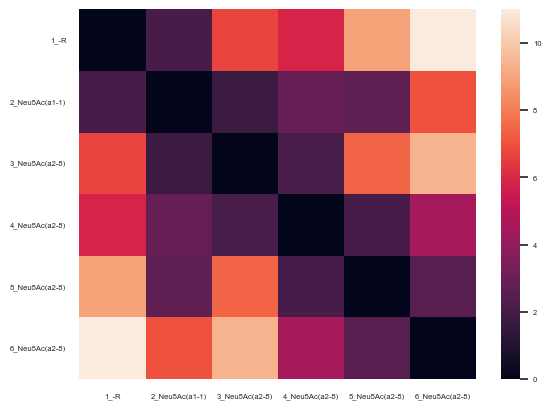

In [77]:
dist_table = make_monosaccharide_contact_table(df,mode='distance')
monosaccharide_contact_map(dist_table)

# Working on Modified (sulfated...) glycans

In [13]:
glycan = "Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"

#successfull glycan : Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc

pdb_path = "glycans_pdb/"+glycan
pdbs = check_available_pdb(pdb_path)

pdb_file = pdb_path + "/" + pdbs[0]
print(pdb_file)
df = explore_threshold(pdb_file, glycan, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
  

glycans_pdb/Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc/Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc_alpha_3.pdb
threshold:2.4
{'1_ROH': '-R', '2_NDG': 'GlcNAc(a1-1)', '3_NAG': 'GlcNAc(b1-4)', '4_BMA': 'Man(b1-4)', '5_MAN': 'Man(a1-3)', '7_GAL': 'Gal(b1-4)', '8_MAN': 'Man(a1-6)', '9_NAG': 'GlcNAc(b1-2)', '10_GAL': 'Gal(b1-4)', '12_FUC': 'Fuc(a1-6)'}
{'2_NDG': ['2_(a1-1)'], '2_(a1-1)': ['1_ROH'], '3_NAG': ['3_(b1-4)'], '3_(b1-4)': ['2_NDG'], '4_BMA': ['4_(b1-4)'], '4_(b1-4)': ['3_NAG'], '5_MAN': ['5_(a1-3)'], '5_(a1-3)': ['4_BMA'], '7_GAL': ['7_(b1-4)'], '7_(b1-4)': ['6_NAG'], '8_MAN': ['8_(a1-6)'], '8_(a1-6)': ['4_BMA'], '9_NAG': ['9_(b1-2)'], '9_(b1-2)': ['8_MAN'], '10_GAL': ['10_(b1-4)'], '10_(b1-4)': ['9_NAG'], '12_FUC': ['12_(a1-6)'], '12_(a1-6)': ['2_NDG']}
[('Gal', 'b1-4'), ('b1-4', 'GlcNAc'), ('GlcNAc', 'b1-2'), ('b1-2', 'Man'), ('Man', 'a1-3'), ('a1-3', 'Man'), (

In [19]:
df2

,record_name,atom_number,atom_name,monosaccharide,chain_id,residue_number,x,y,z,occupancy,temperature_factor,element
0,ATOM,1,HO1,ROH,X,1,34.980,29.260,19.478,1.0,0.0,H
1,ATOM,2,O1,ROH,X,1,35.260,29.908,20.127,1.0,0.0,O
2,ATOM,3,C1,NDG,X,2,34.078,30.681,20.426,1.0,0.0,C
3,ATOM,4,H1,NDG,X,2,34.128,31.677,19.989,1.0,0.0,H
4,ATOM,5,C2,NDG,X,2,33.899,30.943,21.921,1.0,0.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
234,ATOM,235,H3O,FUC,X,12,26.023,28.752,22.131,1.0,0.0,H
235,ATOM,236,C2,FUC,X,12,27.904,27.164,20.044,1.0,0.0,C
236,ATOM,237,H2,FUC,X,12,27.207,26.926,19.239,1.0,0.0,H
237,ATOM,238,O2,FUC,X,12,28.064,26.121,21.030,1.0,0.0,O


In [15]:
df2 = extract_3D_coordinates(pdb_file)
print(list(set(df2['monosaccharide'].to_list())))

['FUC', 'SO3', 'MAN', 'NAG', 'NDG', 'ROH', 'GAL']


In [26]:
def extract_binary_interactions_from_PDB(coordinates_df, threshold):
    """
    Extract binary interactions between C1-2 atoms and oxygen atoms from a DataFrame.

    Parameters:
    - coordinates_df (pd.DataFrame): DataFrame obtained using extract_3D_coordinates.
    - threshold (float): Distance threshold for considering interactions.

    Returns:
    - pd.DataFrame: DataFrame with columns 'Atom', 'Column', and 'Value' representing interactions.
    """
    coordinates_df =  correct_dataframe(extract_3D_coordinates(coordinates_df))
    carbon_1_2_df = coordinates_df[(coordinates_df['atom_name'] == 'C1') | (coordinates_df['atom_name'] == 'C2')]
    oxygen_df = coordinates_df[coordinates_df['element'] == 'O']

    c_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in carbon_1_2_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}
    o_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in oxygen_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}
    print(o_dict)
    atom = []
    column = []
    value = []

    for c_key, c_coords in c_dict.items():
        smallest_distance = 1000
        closest_residue = ''
        c_resnum = c_key.split('_')[0]

        for o_key, o_coords in o_dict.items():
            o_resnum = o_key.split('_')[0]

            if c_resnum != o_resnum:
                sum_dist = np.sum(np.abs(np.array(c_coords) - np.array(o_coords)))

                if sum_dist < smallest_distance:
                    smallest_distance = sum_dist
                    closest_residue = o_key

        if smallest_distance < threshold:
            atom.append(c_key)
            column.append(closest_residue)
            value.append(smallest_distance)

    interactions_df = pd.DataFrame({'Atom': atom, 'Column': column, 'Value': value})
    return interactions_df

In [27]:
extract_binary_interactions_from_PDB(pdb_file,3)

{'1_ROH_O1': [35.26, 29.908, 20.127], '2_NDG_O2N': [34.413, 33.576, 22.125], '2_NDG_O3': [33.186, 30.083, 24.053], '2_NDG_O6': [30.262, 27.886, 20.182], '2_NDG_O5': [32.966, 29.95, 19.9], '2_NDG_O4': [32.207, 27.676, 22.857], '3_NAG_O5': [31.006, 28.383, 24.895], '3_NAG_O6': [31.19, 28.376, 27.835], '3_NAG_O3': [28.824, 24.708, 25.129], '3_NAG_O2N': [32.226, 24.066, 22.682], '3_NAG_O4': [28.185, 26.856, 26.739], '4_MAN_O5': [28.72, 25.194, 28.423], '4_MAN_O6': [28.722, 22.578, 29.553], '4_MAN_O4': [27.997, 25.106, 32.196], '4_MAN_O2': [25.888, 25.637, 28.314], '4_MAN_O3': [25.715, 26.338, 31.087], '5_MAN_O6': [24.583, 30.908, 30.493], '5_MAN_O5': [25.263, 28.523, 31.94], '5_MAN_O4': [21.461, 28.155, 32.148], '5_MAN_O3': [22.289, 26.147, 33.818], '5_MAN_O2': [24.872, 27.287, 34.611], '6_NAG_O5': [25.343, 25.766, 36.361], '6_NAG_O6': [24.227, 24.465, 38.736], '6_NAG_O3': [27.905, 28.15, 38.475], '6_NAG_O2N': [25.737, 30.459, 35.402], '6_NAG_O4': [27.929, 25.496, 39.007], '7_GAL_O5': [28.

,Atom,Column,Value
0,2_NDG_C1,1_ROH_O1,2.254
1,3_NAG_C1,2_NDG_O4,2.070
2,4_MAN_C1,3_NAG_O4,1.833
3,5_MAN_C1,4_MAN_O3,2.083
4,6_NAG_C1,5_MAN_O2,2.489
5,7_GAL_C1,6_NAG_O4,1.729
6,8_MAN_C1,4_MAN_O6,2.400
7,9_NAG_C1,8_MAN_O2,2.074
8,10_GAL_C1,9_NAG_O4,2.338
9,12_FUC_C1,2_NDG_O6,2.367


In [82]:
### Strat: detect which component are not monosaccharides.
### For each of them, detect the closest monosaccharide.
### Detect the type of linkage between monosaccharide and modification (to know if it is 6S, 3S...)
### Annotate each non-monosaccharide and its linked monosaccharide with custom annotation in monosaccharide column
### GlcNAc6S : NAG + SO3 + C6-S1 linkage : NAG6S (residue_number = monosaccharide residue number)

# In pipeline, if IUPAC is detected as containing modified monosaccharide, pre-step of annotation of pdbfile
modified_mono = ["GlcNAc6S"]

# List of non-monosaccharide
non_mono_list=['SO3']

# Dict of modifications {link_modif:IUPAC} 
#modif_dict = {"6SO3":"6S"} #--> allows to write GlcNAc

# Custom PDB codes to IUPAC
custom_pdb = {"NAG6SO3":"GlcNAc6S"}

# To modify dict
to_modify_dict = {}

modified_glycan = False 
for mm in modified_mono :
    if mm in glycan : 
        modified_glycan = True

if modified_glycan == True :
    pdb_path = "glycans_pdb/"+glycan
    pdbs = check_available_pdb(pdb_path)

    pdb_file = pdb_path + "/" + pdbs[0]
    print(pdb_file)

    df = extract_3D_coordinates(pdb_file)

    #list of residue_number
    resnum = list(set(df.residue_number.to_list()))
    resdict = {}
    for x in resnum :
        mono = list(set(df['monosaccharide'][df['residue_number']==x].to_list()))[0]
        resdict[x] = mono
    print(resdict)

    #make an atomic distance table
    dist_table = make_atom_contact_table(df)

    #For each element in resdict, those that are non-monosaccharide must be investigated
    for key in resdict :
        val = resdict[key]
        if val in non_mono_list :
            element = str(key) + "_" + val
            contact_table = dist_table.filter(regex=element) #keep only columns with a given non-monosaccharide
            mask = ~contact_table.index.str.contains('|'.join(contact_table.columns))
            contact_table = contact_table.loc[mask] #keep only lines without this given non-monosaccharide
            partners = contact_table[contact_table != 0].stack().idxmin() #valeur non nulle la plus faible de la dataframe
            sugar_partner = partners[0]
            print(sugar_partner)

            #get monosaccharide resnum and non-mono resnum to give them mono resnum but custom monosaccharide annotation
            sugar_resnum, sugar, atom, atom_num = sugar_partner.split("_")
            link_pos = str([''.join(c for c in s if c.isdigit()) for s in atom][-1])
            modif = link_pos+val
            modified_mono = sugar + modif 
            modified_mono_iupac = custom_pdb[modified_mono]


            print(link_pos)
            print(modif)
            print(modified_mono)
            print(modified_mono_iupac)
            print("stop")

            #List all resnum lines that will require modification and which modif
            to_modify_dict[int(sugar_resnum)] =  modified_mono
            to_modify_dict[key] =  [modified_mono, sugar_resnum]

print(to_modify_dict)


# charger la dataframe à partir du fichier file.pdb
df = extract_3D_coordinates(pdb_file)

# parcourir chaque ligne de la dataframe et appliquer les règles
for index, row in df.iterrows():
    residue_number = row['residue_number']
    if residue_number in to_modify_dict:
        if type(to_modify_dict[residue_number]) is str : 
            monosaccharide = to_modify_dict[residue_number]
            print(monosaccharide)
            df.at[index, 'monosaccharide'] = monosaccharide
        
        if type(to_modify_dict[residue_number]) is list:
            monosaccharide = to_modify_dict[residue_number][0]
            print(monosaccharide)
            df.at[index, 'monosaccharide'] = monosaccharide
            new_residue_number = int(to_modify_dict[residue_number][1])
            df.at[index, 'residue_number'] = new_residue_number

# conserver la dataframe modifiée en variable
df_modified = df.copy()
new_df= df_modified.sort_values(by='residue_number', key=lambda x: x.astype(int))

# afficher le résultat
##print("Nom de la colonne :", col_name)
#print("Index de la ligne :", row_index)


        




glycans_pdb/Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc/Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc_alpha_3.pdb
{1: 'ROH', 2: 'NDG', 3: 'NAG', 4: 'MAN', 5: 'MAN', 6: 'NAG', 7: 'GAL', 8: 'MAN', 9: 'NAG', 10: 'GAL', 11: 'SO3', 12: 'FUC'}
9_NAG_O6_175
6
6SO3
NAG6SO3
GlcNAc6S
stop
{9: 'NAG6SO3', 11: ['NAG6SO3', '9']}
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3
NAG6SO3


In [74]:
new_df.to_csv("test.csv")

In [48]:
contact_table

,11_SO3_S1_215,11_SO3_O1_216,11_SO3_O2_217,11_SO3_O3_218
1_ROH_HO1_1,11.0,11.0,11.0,11.000
1_ROH_O1_2,11.0,11.0,11.0,11.000
2_NDG_C1_3,11.0,11.0,11.0,11.000
2_NDG_H1_4,11.0,11.0,11.0,11.000
2_NDG_C2_5,11.0,11.0,11.0,11.000
...,...,...,...,...
12_FUC_H3O_235,11.0,11.0,11.0,11.000
12_FUC_C2_236,11.0,11.0,11.0,11.000
12_FUC_H2_237,11.0,11.0,11.0,11.000
12_FUC_O2_238,11.0,11.0,11.0,8.346


In [25]:
df2[df2['monosaccharide']=='SO3']

,record_name,atom_number,atom_name,monosaccharide,chain_id,residue_number,x,y,z,occupancy,temperature_factor,element
214,ATOM,215,S1,SO3,X,11,23.219,21.320,21.781,1.0,0.0,S
215,ATOM,216,O1,SO3,X,11,22.107,21.381,22.625,1.0,0.0,O
216,ATOM,217,O2,SO3,X,11,23.236,20.197,20.932,1.0,0.0,O
217,ATOM,218,O3,SO3,X,11,23.396,22.467,21.006,1.0,0.0,O


In [34]:
dist_table.columns

Index(['1_ROH_HO1_1', '1_ROH_O1_2', '2_NDG_C1_3', '2_NDG_H1_4', '2_NDG_C2_5',
       '2_NDG_H2_6', '2_NDG_N2_7', '2_NDG_H2N_8', '2_NDG_C2N_9',
       '2_NDG_CME_10',
       ...
       '12_FUC_O4_230', '12_FUC_H4O_231', '12_FUC_C3_232', '12_FUC_H3_233',
       '12_FUC_O3_234', '12_FUC_H3O_235', '12_FUC_C2_236', '12_FUC_H2_237',
       '12_FUC_O2_238', '12_FUC_H2O_239'],
      dtype='object', length=239)

In [83]:
new_df

,record_name,atom_number,atom_name,monosaccharide,chain_id,residue_number,x,y,z,occupancy,temperature_factor,element
0,ATOM,1,HO1,ROH,X,1,34.980,29.260,19.478,1.0,0.0,H
1,ATOM,2,O1,ROH,X,1,35.260,29.908,20.127,1.0,0.0,O
27,ATOM,28,O4,NDG,X,2,32.207,27.676,22.857,1.0,0.0,O
26,ATOM,27,O5,NDG,X,2,32.966,29.950,19.900,1.0,0.0,O
25,ATOM,26,O6,NDG,X,2,30.262,27.886,20.182,1.0,0.0,O
...,...,...,...,...,...,...,...,...,...,...,...,...
219,ATOM,220,H1,FUC,X,12,29.489,26.605,18.728,1.0,0.0,H
218,ATOM,219,C1,FUC,X,12,29.212,27.531,19.220,1.0,0.0,C
237,ATOM,238,O2,FUC,X,12,28.064,26.121,21.030,1.0,0.0,O
227,ATOM,228,C4,FUC,X,12,27.072,29.533,19.628,1.0,0.0,C


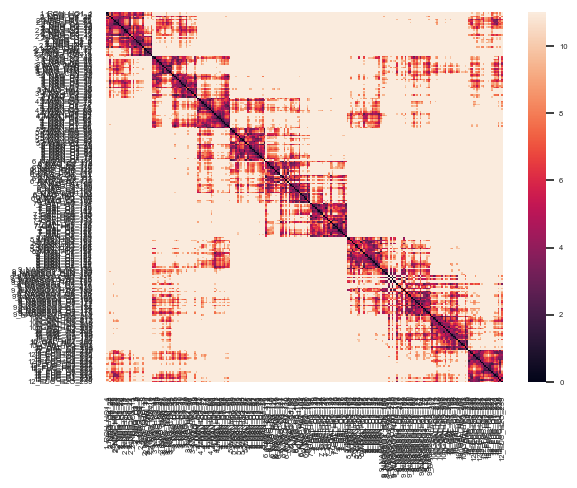

In [92]:
dist_table = make_atom_contact_table(new_df, mode="inclusive")
monosaccharide_contact_map(dist_table)

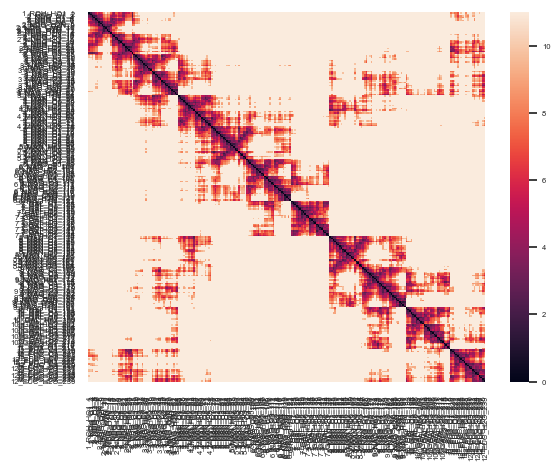

In [93]:
dist_table = make_atom_contact_table(df2, mode="inclusive")
monosaccharide_contact_map(dist_table)